# QISKIT Introduction

Here are some sample pieces of code to demonstrate building and running circuits.

All circuits will be run on simulators working on the 

## Quantum Fourier Transform by Hand

Start with a `QuantumCircuit` object for a 3-qubit system and build up a QFT using individual gates.

N.B. Qiskit's least significant bit has the lowest index.

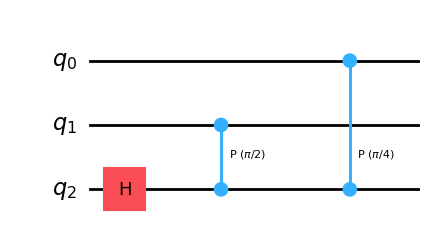

In [1]:
from qiskit import QuantumCircuit
import numpy as np
pi = np.pi

qft_c = QuantumCircuit(3)
# Hadamard gate is constructed with the 'QuantumCircuit.h' method
qft_c.h(2)
# CROT from qubit 1 to qubit 2
qft_c.cp(pi/2, 1, 2)
# CROT from qubit 2 to qubit 0
qft_c.cp(pi/4, 0, 2) 
qft_c.draw()

## Inverse QFT

Instead of building all the H, CROT and SWAP gates by hand, we can use a prebuild QFT class which has this already.

We will use this to build an inverse transform

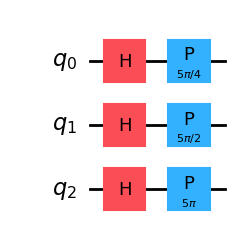

In [2]:
from qiskit import QuantumCircuit

nqubits = 3
number = 5

circuit = QuantumCircuit(nqubits)
for qubit in range(nqubits):
    circuit.h(qubit)
circuit.p(number*pi/4,0)
circuit.p(number*pi/2,1)
circuit.p(number*pi,2)
circuit.draw()

We have Fourier state $|\tilde{5} \rangle$

We can create state vector diagrams:

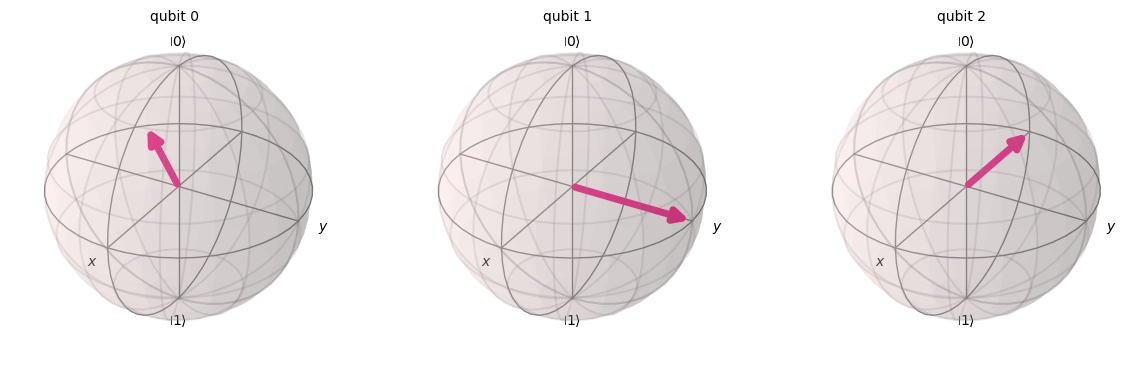

In [3]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector

qc_init = circuit.copy()
qc_init.save_statevector()
sim = AerSimulator()
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

Build the inverse QFT and append it to the circuit.

Also measure all qubit.

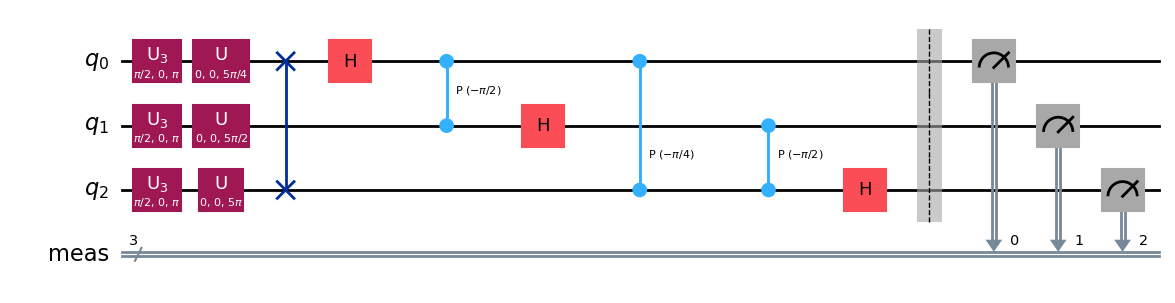

In [4]:
from qiskit.circuit.library import QFT

qft = QFT(num_qubits=3, approximation_degree=0, do_swaps=True, inverse=True, insert_barriers=False, name='qft').to_gate()
circuit.append(qft, circuit.qubits[:nqubits])
circuit.measure_all()
circuit.decompose(reps=2).draw()

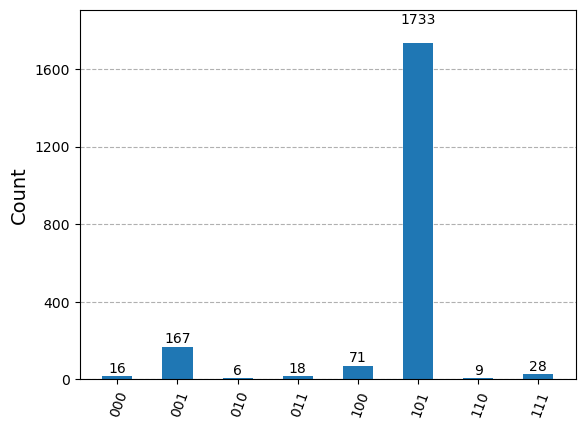

In [5]:
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeManilaV2

# A fake 5 qubit backend.
backend = FakeManilaV2()
shots = 2048
transpiled_qc = transpile(circuit, backend, optimization_level=3)
job = backend.run(transpiled_qc, shots=shots)

counts = job.result().get_counts()
plot_histogram(counts)

And we recover 5 as 101!